In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

import drawsvg


In [3]:
import xylo
import xylo.types as t
import xylo.tuning

In [4]:
bar_width = 40
node_ratio = 0.22

# bar_spacing = 7
bar_spacing = 8
# angle1 = math.radians(2.68)
angle1 = math.radians(2.624)
# angle2 = math.radians(9.423)
angle2 = math.radians(9.23)

In [5]:
lengths = xylo.tuning.yamaha_YX500R.lengths
lengthsmm = { k : v * 1000 for k, v in lengths.items() }
x_index = { k: (380 - v) / 10 for k, v in lengthsmm.items() }
# x at left side of bar
x = { k: bar_spacing + (bar_width + bar_spacing) * v for k, v in x_index.items() }

{45: 0.0, 46: 0.5, 47: 1.0, 48: 1.5, 49: 2.0, 50: 2.5, 51: 3.0, 52: 4.0, 53: 4.5, 54: 5.0, 55: 5.5, 56: 6.0, 57: 7.0, 58: 7.5, 59: 8.0, 60: 8.5, 61: 9.0, 62: 9.5, 63: 10.0, 64: 11.0, 65: 11.5, 66: 12.0, 67: 12.5, 68: 13.0, 69: 14.0, 70: 14.5, 71: 15.0, 72: 15.5, 73: 16.0, 74: 16.5, 75: 17.0, 76: 18.0, 77: 18.5, 78: 19.0, 79: 19.5, 80: 20.0, 81: 21.0, 82: 21.5, 83: 22.0, 84: 22.5, 85: 23.0, 86: 23.5, 87: 24.0, 88: 25.0}


In [204]:
naturals = { k for k, v in lengthsmm.items() if v % 10 == 0 }
accidentals = { k for k, v in lengthsmm.items() if v % 10 != 0 }

In [205]:
y1s = { k: (380 * node_ratio) - ((x[k] - (bar_spacing + bar_width / 2)) * math.tan(angle1)) for k in lengths }
y2s = { k: (380 * (1 - node_ratio)) - ((x[k] - (bar_spacing + bar_width / 2)) * math.tan(angle2)) for k in lengths }

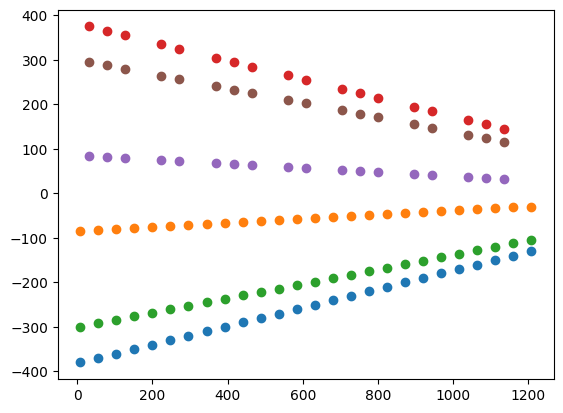

In [206]:
plt.scatter([x[k] for k in naturals], [-lengthsmm[k] for k in naturals])
plt.scatter([x[k] for k in naturals], [-y1s[k] for k in naturals])
plt.scatter([x[k] for k in naturals], [-y2s[k] for k in naturals])
plt.scatter([x[k] for k in accidentals], [lengthsmm[k] for k in accidentals])
plt.scatter([x[k] for k in accidentals], [y1s[k] for k in accidentals])
plt.scatter([x[k] for k in accidentals], [y2s[k] for k in accidentals])

In [207]:
y1s

{45: 84.51658970115322,
 46: 83.41668205976934,
 47: 82.31677441838546,
 48: 81.21686677700158,
 49: 80.1169591356177,
 50: 79.01705149423383,
 51: 77.91714385284995,
 52: 75.71732857008219,
 53: 74.61742092869831,
 54: 73.51751328731443,
 55: 72.41760564593054,
 56: 71.31769800454666,
 57: 69.1178827217789,
 58: 68.01797508039502,
 59: 66.91806743901114,
 60: 65.81815979762726,
 61: 64.71825215624338,
 62: 63.6183445148595,
 63: 62.51843687347562,
 64: 60.31862159070786,
 65: 59.21871394932398,
 66: 58.1188063079401,
 67: 57.01889866655622,
 68: 55.91899102517233,
 69: 53.71917574240457,
 70: 52.619268101020694,
 71: 51.519360459636815,
 72: 50.419452818252935,
 73: 49.319545176869056,
 74: 48.21963753548518,
 75: 47.11972989410129,
 76: 44.91991461133353,
 77: 43.82000696994965,
 78: 42.72009932856577,
 79: 41.620191687181894,
 80: 40.520284045798014,
 81: 38.32046876303025,
 82: 37.22056112164637,
 83: 36.12065348026249,
 84: 35.02074583887861,
 85: 33.92083819749473,
 86: 32.820930

In [208]:
{ k: lengthsmm[k] - y2s[k] for k in lengthsmm }

{45: 80.34995924300614,
 46: 79.25000815139873,
 47: 78.15005705979127,
 48: 77.05010596818386,
 49: 75.95015487657639,
 50: 74.85020378496898,
 51: 73.75025269336152,
 52: 71.55035051014664,
 53: 70.45039941853918,
 54: 69.35044832693177,
 55: 68.2504972353243,
 56: 67.1505461437169,
 57: 64.95064396050202,
 58: 63.850692868894555,
 59: 62.75074177728712,
 60: 61.65079068567968,
 61: 60.550839594072244,
 62: 59.45088850246481,
 63: 58.35093741085737,
 64: 56.15103522764247,
 65: 55.05108413603506,
 66: 53.95113304442759,
 67: 52.851181952820184,
 68: 51.75123086121272,
 69: 49.551328677997844,
 70: 48.45137758639041,
 71: 47.35142649478297,
 72: 46.25147540317553,
 73: 45.151524311568096,
 74: 44.05157321996063,
 75: 42.95162212835319,
 76: 40.75171994513832,
 77: 39.65176885353088,
 78: 38.551817761923445,
 79: 37.45186667031601,
 80: 36.35191557870857,
 81: 34.1520133954937,
 82: 33.05206230388626,
 83: 31.952111212278794,
 84: 30.852160120671357,
 85: 29.75220902906392,
 86: 28.652

In [209]:
y2s

{45: 299.65004075699386,
 46: 295.74999184860127,
 47: 291.84994294020873,
 48: 287.94989403181614,
 49: 284.0498451234236,
 50: 280.149796215031,
 51: 276.2497473066385,
 52: 268.44964948985336,
 53: 264.5496005814608,
 54: 260.64955167306823,
 55: 256.7495027646757,
 56: 252.8494538562831,
 57: 245.04935603949798,
 58: 241.14930713110545,
 59: 237.24925822271288,
 60: 233.34920931432032,
 61: 229.44916040592776,
 62: 225.5491114975352,
 63: 221.64906258914263,
 64: 213.84896477235753,
 65: 209.94891586396494,
 66: 206.0488669555724,
 67: 202.14881804717982,
 68: 198.24876913878728,
 69: 190.44867132200216,
 70: 186.5486224136096,
 71: 182.64857350521703,
 72: 178.74852459682447,
 73: 174.8484756884319,
 74: 170.94842678003937,
 75: 167.0483778716468,
 76: 159.24828005486168,
 77: 155.34823114646912,
 78: 151.44818223807655,
 79: 147.548133329684,
 80: 143.64808442129143,
 81: 135.8479866045063,
 82: 131.94793769611374,
 83: 128.0478887877212,
 84: 124.14783987932864,
 85: 120.2477909

In [194]:
def mkdots(keys, cuts, filename, offsetx = 1.3, rot = 0):
  d = drawsvg.Drawing('297mm', '210mm')
  d.append(drawsvg.Rectangle(0, 0, '297mm', '210mm', stroke='green', stroke_width=2, fill='none'))
  d.append(drawsvg.Text(filename, '5mm', '20mm', '8mm'))
  grp = drawsvg.Group(transform = f'rotate({rot})')
  y = 10
  for k in keys:
    cut = cuts[k] + offsetx
    grp.append(drawsvg.Text(f'{k}', '2mm', f'{cut-1}mm', f'{y + 3}mm'))
    grp.append(drawsvg.Circle(f'{cut}mm', f'{y + 1}mm', '0.5mm'))
    grp.append(drawsvg.Rectangle(f'{offsetx}mm', f'{y}mm', f'{cut}mm', f'0.5mm', stroke='red', stroke_width=1))
  grp.append(drawsvg.Circle(f'{offsetx}mm', f'{y+1}mm', '1mm'))

  d.append(grp)

  d.save_html(f'data/layout/{filename}.html')
  return d

mkdots(naturals, y1s, 'natural-rear')
mkdots(naturals, y2s, 'natural-front', rot = 30, offsetx=10)
mkdots(accidentals, y1s, 'accidental-front')
mkdots(accidentals, y2s, 'accidental-rear', rot = 30, offsetx=10)